<a href="https://colab.research.google.com/github/ThousandAI/pycs4001/blob/main/class08/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/ThousandAI/pycs4001/main/class07/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
X = np.array(data[["Daily Time Spent on Site", "Age", "Area Income", "Daily Internet Usage", "Male"]])
Y = np.array(data["Clicked on Ad"])
train_x, test_x, train_y, test_y  = train_test_split(X, Y, test_size=0.2, random_state=10)

In [5]:
scaler = StandardScaler()
sc_x = scaler.fit_transform(train_x)

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
predictions = knn.predict(test_x)
print(confusion_matrix(test_y, predictions))
print(knn.score(test_x, test_y))

[[71 25]
 [35 69]]
0.7


train_score: [1.0, 0.97, 0.97375, 0.97, 0.97125, 0.96625, 0.96875, 0.9675, 0.96875, 0.96625, 0.9675, 0.96625, 0.9675, 0.965, 0.9675, 0.965, 0.96625, 0.96625, 0.9675, 0.9675]
test_score: [0.93, 0.955, 0.955, 0.945, 0.94, 0.945, 0.935, 0.935, 0.935, 0.945, 0.945, 0.945, 0.945, 0.95, 0.945, 0.945, 0.94, 0.95, 0.945, 0.945]


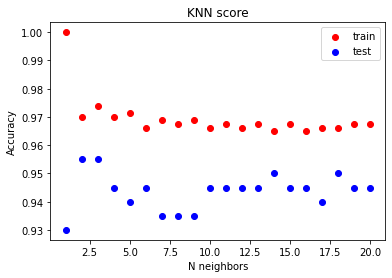

In [ ]:
train_score = []
test_score = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    train_score.append(knn.score(train_x, train_y))
    test_score.append(knn.score(test_x, test_y))

print(f"train_score: {train_score}")
print(f"test_score: {test_score}")

x_axis = np.arange(1,21,1)
plt.scatter(x_axis, np.array(train_score), color="r", label="train")
plt.scatter(x_axis, np.array(test_score), color="b", label="test")
plt.title("KNN score")
plt.xlabel("N neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()